#### Topics: Classification using SVM and Adaboost
#### Assigned: Wednesday May 9
#### Due: Sunday May 20
----------------------------------------


### Report 
With reference to the code and plots in the detailed report & code below

----------------------------------------

##### 1. SVM 

Implementation available from In[11] onwards


![SVM Boundaries](SVM.png)


##### 2. ADABOOST

Implementation available from In[29] onwards


![Weak Learners](weak_1075.png)



#### DISCUSSION : Observations Comparison among logistic regression,SVM, neural network, Adaboost for the current dataset. Which one gives the best results :
Based on the probability of error among all the technique mentioned above. The probability of error are as follows for all:

1. Logistic Regression : 0.36 
2. Neural Network : 0.15 
3. SVM : 0.1375 
4. Adaboost : 0.1255

#### OBSERVATIONS 
According to the probability distribution above. Though Adaboost have the minimum probability of error and the logistic regression has the maximum probabilty of error. After running the Adaboost algorithm for about 12000 times it seems there is lot of overfitting. hence if learned parameters are going to be tested on the test data, here are high chances that the probability of error is going to be too high, hence adaboost is not so good for the current data set we are using.

#### Neural Network
Neural network has the best performance and minimum probability of error. The weights vectors converges to a constant value faster in case of Neural Network. While on the same data set in case of SVM and Adaboost it takes total of around 25-30 minutes and individual 15 minutes for SVM and 10 minutes for ADdaboost, hence we can conclude Neural Network are much faster and have lower probability of error as compared to logistic regressiion , SVM , ADABoost and Kmeans.













# Code Section

In [7]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# Params
total_samples = 400
#HyperParameters 
sigma = 1 # L

In [8]:
#Class 0
num_samples_0 = total_samples/2

#mean_0 = np.array([0,0]).T #mean of class 0
mean_0 = (0,0) #mean of class 0

#Eigen Values pair
lambda_01 = 2
lambda_02 = 1

theta_0 = 0

# For More info check the http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

#Rotation Matrix
q_0 = np.array([[np.cos(theta_0), -np.sin(theta_0)],[np.sin(theta_0),np.cos(theta_0)]])
q_0_inv = q_0.T

# Scaling factor which is represented in Eigen Values Pair
s_0 = np.array([[lambda_01,0],[0,lambda_02]]) 

#Covariance is computed as the following. 

cov_0 = q_0*s_0*q_0_inv

print(cov_0.shape)

#Multivariate Distribution. samples_0 is the num_samples_0*2D array where each row represent X[1] and x[2] component
samples_0 = np.random.multivariate_normal(mean_0,cov_0,int(num_samples_0))

# Data points scaled to zero mean and unit variance.
#scaled_samples_0 = preprocessing.scale(samples_0)

labels_0 = np.zeros((int(num_samples_0),1)) # label for class 0 as -1
labels_0[:,0] = -1

# Formation of the whole data set with it's corresponding labels
sample_0_data_set = np.concatenate((samples_0, labels_0),axis = 1)
#scaled_sample_0_data_set = np.concatenate((scaled_samples_0, labels_0),axis = 1)

#Class 1 Gaussian Mixture with two components

num_samples_1 = total_samples/2
pi_A = 1/3.0
pi_B = 2/3.0
###### Start of Component A
## Component A

num_samples_1A = np.random.binomial(num_samples_1,pi_A)
num_samples_1B = num_samples_1 - num_samples_1A

mean_1A = np.array([-2,1]).T #mean of class 1 component A

#Eigen Values pair
lambda_1A1 = 2
lambda_1A2 = 1/4.0

theta_1A = -3*np.pi/4.0

# For More info check the http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

#Rotation Matrix
q_1A = np.array([[np.cos(theta_1A), -np.sin(theta_1A)],[np.sin(theta_1A),np.cos(theta_1A)]])
q_1A_inv = q_1A.T

# Scaling factor which is represented in Eigen Values Pair
s_1A = np.array([[lambda_1A1,0],[0,lambda_1A2]]) 

#Covariance is computed as the following. 
cov_1A = q_1A.dot(s_1A).dot(q_1A_inv)


#Multivariate Distribution. samples_0 is the num_samples_0*2D array where each row represent X[1] and x[2] component
samples_1A = np.random.multivariate_normal(mean_1A,cov_1A,num_samples_1A)

# Data points scaled to zero mean and unit variance.
#scaled_samples_1A = preprocessing.scale(samples_1A)

###### End of Component A

###### Start of Component B
## Component B

mean_1B = np.array([3,2]).T #mean of class 1 component A

#Eigen Values pair
lambda_1B1 = 3
lambda_1B2 = 1

theta_1B = np.pi/4.0

# For More info check the http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

#Rotation Matrix
q_1B = np.array([[np.cos(theta_1B), -np.sin(theta_1B)],[np.sin(theta_1B),np.cos(theta_1B)]])
q_1B_inv = q_1B.T

# Scaling factor which is represented in Eigen Values Pair
s_1B = np.array([[lambda_1B1,0],[0,lambda_1B2]]) 

#Covariance is computed as the following. 

cov_1B = q_1B.dot(s_1B).dot(q_1B_inv)

#Multivariate Distribution. samples_0 is the num_samples_0*2D array where each row represent X[1] and x[2] component
samples_1B = np.random.multivariate_normal(mean_1B,cov_1B,int(num_samples_1B))

# Data points scaled to zero mean and unit variance.
#scaled_samples_1B = preprocessing.scale(samples_1B)

###### End of Component B
samples_1 = np.concatenate((samples_1A,samples_1B))
#samples_1 = pi_A*samples_1A + pi_B*samples_1B
#scaled_samples_1 = pi_A*scaled_samples_1A + pi_B*scaled_samples_1B

labels_1 = np.ones((int(num_samples_1),1)) # label for class 1 as +1
#labels_1[:,0] = 1

# Formation of the whole data set with it's corresponding labels
sample_1_data_set = np.concatenate((samples_1, labels_1),axis = 1)
#scaled_sample_1_data_set = np.concatenate((scaled_samples_1, labels_0),axis = 1)




(2, 2)


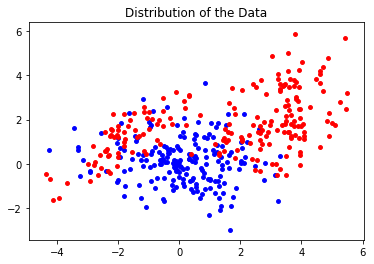

In [9]:
# plot samples from Class 0 (X_0) and Class 1 (X_1) plt.figure(0)
#maxX = 7.5 # region to plot
#maxY = 7.5
plt.title("Distribution of the Data")
plt.scatter(sample_0_data_set[:,0], sample_0_data_set[:,1], s=15, c="blue") 
plt.scatter(sample_1_data_set[:,0], sample_1_data_set[:,1], s=15, c="red") 
#plt.axis([-maxX, maxX, -maxY, maxY])
plt.show()



In [10]:
data_set = np.concatenate((sample_0_data_set,sample_1_data_set))
np.random.shuffle(data_set)
data_set


array([[-0.91828172, -0.77850471, -1.        ],
       [ 0.0321756 , -0.1082165 , -1.        ],
       [ 0.83151929, -1.1431078 , -1.        ],
       ...,
       [-2.1412134 ,  1.21831522,  1.        ],
       [ 1.64712048, -2.96929057, -1.        ],
       [-0.36585517,  0.49704773, -1.        ]])

## 1. SVM:

### Gaussian kernel k(x, x') = exp (− (||x − x'||^2) / 2 * (L^2) 



#### Approach
For the sake of understanding the concepts behind support vector classification, we will instead implement a version of the Sequential Minimal Optimization (SMO) algorithm as described by John Platt in 1998 [PDF] to solve our optimization problem.

SMO works by breaking down the dual form of the SVM optimzation problem into many smaller optimzation problems that are more easily solvable. In a nutshell, the algorithm works like this:

- Two multiplier values ( αi  and  αj ) are selected out and their values are optimized while holding all other  α  values constant.
- Once these two are optimized, another two are chosen and optimized over.
- Choosing and optimizing repeats until the convergence, which is determined based on the problem constraints. Heuristics are used to select the two  α values to optimize over, helping to speed up convergence. The heuristics are based on error cache that is stored while training the model.


#### What we're looking for
What we want out of the algorithm is a vector of  α  values that are mostly zeros, except where the corresponding training example is closest to the decision boundary. These examples are our support vectors and should lie near the decision boundary. We should end up with a few of them once our algorithm has converged. What this implies is that the resultant decision boundary will only depend on the training examples closest to it. If we were to add more examples to our training set that were far from the decision boundary, the support vectors would not change. However, labeled examples closer to the decision boundary can exert greater influence on the solution, subject to the degree of regularization. In other words, non-regularized (hard-margin) SVMs can be sensitive to outliers, while regularized (soft-margin) models are not.


### 1.1) Plot the decision boundaries, and display the support vectors. 




In [11]:
def gaussian_kernel(x, y, sigma=0.9):
    if np.ndim(x) == 1 and np.ndim(y) == 1:
        result = np.exp(- np.linalg.norm(x - y) / (2 * sigma ** 2))
    elif (np.ndim(x) > 1 and np.ndim(y) == 1) or (np.ndim(x) == 1 and np.ndim(y) > 1):
        result = np.exp(- np.linalg.norm(x - y, axis=1) / (2 * sigma ** 2))
    elif np.ndim(x) > 1 and np.ndim(y) > 1:
        result = np.exp(- np.linalg.norm(x[:, np.newaxis] - y[np.newaxis, :], axis=2) / (2 * sigma ** 2))
    return result

#x_len, y_len = 5, 10
#gaussian_kernel(np.random.rand(x_len, 1), np.random.rand(y_len, 1)).shape == (5,10)

# Objective function to optimize# Objec 
def objective_function(alphas,kernel, data):
    """Returns the SVM objective function based in the input model defined by:
    `alphas`: vector of Lagrange multipliers
    `target`: vector of class labels (-1 or 1) for training data
    `kernel`: kernel function
    `X_train`: training data for model."""
    return np.sum(alphas) - 0.5* np.sum(data[:,2] * data[:,2] * gaussian_kernel(data[:,0:2], data[:,0:2]) * aplhas * aplhas)


# Decision function
def decision_function(alphas,data,b,X_Test):
    """Applies the SVM decision function to the input feature vectors in `x_test`."""
    # The following is the loop function.
    sum = 0
    for i in range(len(data)):
        sum += alphas[i] * data[i,2] * gaussian_kernel(data[i,0:2],X_Test)
    f_x = sum + b
    return f_x

def compute_range(alphas,i,j,data,C):
    if (data[i,2] != data[j,2]):
        L = max(0,alphas[j]-alphas[i])
        H = min(C,C+alphas[j]-alphas[i])
    elif (data[i,2] == data[j,2]):  
        L = max(0,alphas[i]+alphas[j]-C)
        H = min(C,alphas[i]+alphas[j])
    return L,H    

# Intialization
alphas = np.zeros(len(data_set))
b = 0.0
passes = 0
max_passes = 300
C = 0.2
tol = 0.001
m = len(data_set)
data = data_set

while(passes < max_passes):
    
    num_changed_alphas = 0
    for i in range(m):
        E_i = decision_function(alphas,data,b,data[i,0:2]) - data[i,2]
        if(((data[i,2] * E_i) < (-1) * tol and alphas[i] < C) or ((data[i,2]*E_i)>tol and alphas[i]>0 )):
            j = np.random.randint(0,m)
            while(j==i):
                j = np.random.randint(0,m)
            
            E_j = decision_function(alphas,data,b,data[j,0:2]) - data[j,2]

            alpha_i_old = alphas[i]
            alpha_j_old = alphas[j]
            
            L,H = compute_range(alphas,i,j,data,C)
            
            if L == H:
                continue
            k_ij = gaussian_kernel(data[i,0:2],data[j,0:2])
            k_ii = gaussian_kernel(data[i,0:2],data[i,0:2])
            k_jj = gaussian_kernel(data[j,0:2],data[j,0:2])
            eta = 2 * k_ij - k_ii - k_jj
            if eta>=0:
                continue
            
            alphas[j] = alphas[j] - (data[j,2] * (E_i - E_j)/eta)
            
            if alphas[j] > H:
                alphas[j] = H
            elif alphas[j] < L:
                alphas[j] = L
                
            if abs(alphas[j] - alpha_j_old) < 0.00001:
                continue
             
            alphas[i] = alphas[i] + data[i,2] * data[j,2] * (alpha_j_old - alphas[j])
            
            b_1 = b - E_i - data[i,2]*(alphas[i]-alpha_i_old)*k_ii - data[j,2]*(alphas[j]-alpha_j_old)*k_ij
            
            b_2 = b - E_j - data[i,2]*(alphas[i]-alpha_i_old)*k_ij - data[j,2]*(alphas[j]-alpha_j_old)*k_ij
            if alphas[i]<C and alphas[i] > 0:
                b = b_1
            elif alphas[j]<C and alphas[j] > 0: 
                b = b_2
            else: 
                b = (b_1+b_2)/2.0
            num_changed_alphas += 1

    if num_changed_alphas == 0:
        #print ("Pass {}".format(passes))
        passes += 1
    else:
        passes = 0


count =0
for i in range(m):
    if alphas[i] !=0 :
         count+=1
print("Completed\n Alphas Count: ", count)

Completed
 Alphas Count:  230


    """Plots the model's decision boundary on the input axes object.
    Range of decision boundary grid is determined by the training data.
    Returns decision boundary grid and axes object (`grid`, `ax`)."""

<class 'list'>


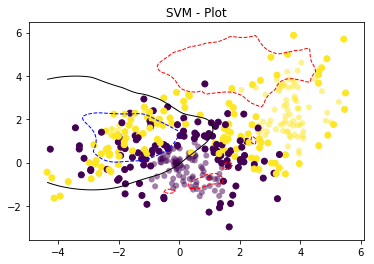

In [13]:
def plot_decision_function(alphas,data,b,X_Test):
    Y = gaussian_kernel(data[:,0:2], X_Test)
    result = np.dot(alphas * data[:,2] , Y ) + b
    return result

def plot_decision_boundary(b,alphas,ax, resolution=100, colors=('b', 'k', 'r')):
        xrange = np.linspace(data_set[:,0].min(), data_set[:,0].max(), resolution)
        yrange = np.linspace(data_set[:,1].min(), data_set[:,1].max(), resolution)
        grid = [[plot_decision_function(alphas, data_set,b,
                                   np.array([xr, yr])) for yr in yrange] for xr in xrange]
        print (type(grid))
        grid = np.array(grid).reshape(len(xrange), len(yrange))
        
        # Plot decision contours using grid and
        # make a scatter plot of training data
        ax.contour(xrange, yrange, grid, (-1, 0, 1), linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=colors)
        ax.scatter(data_set[:,0], data_set[:,1],
                   c=data_set[:,2], cmap=plt.cm.viridis, lw=0, alpha=0.5)
        
        # Plot support vectors (non-zero alphas)
        # as circled points (linewidth > 0)
        mask = alphas != 0.0
        ax.scatter(data_set[:,0][mask], data_set[:,1][mask],
                   c=data_set[:,2][mask], cmap=plt.cm.viridis)
        
        return grid, ax

fig, ax = plt.subplots()
grid, ax = plot_decision_boundary(b, alphas,ax)
plt.title("SVM - Plot")
plt.savefig("SVM.png")
plt.show()


In [14]:
label_hat = []
correct = 0
for i in range(len(data_set)):
    result = np.sign(plot_decision_function(alphas, data_set,b,data_set[i,0:2]))
    if result == data_set[i,2]:
        correct += 1
error = len(data_set)- correct
print ('Misclassification Error is {}'.format(error/float(len(data_set))))


Misclassification Error is 0.1375


1.2 Obeservation between misclassification done in case of using kernelized logistic regression and SVM.

### Prob of Error

- Kernelized Logistic Regression : Perror_c0, Perror_c1 :  0.16 0.16
- SVM Misclassification Error : 0.1375



##### Sample to compare with the SKlearn package 
- The SKlearn RBF kernel uses  K(x, x') = exp(-gamma * ||x-x'||^2) 
- Here gamma = 1/(2 * (L^2)) to make it into a gaussian kernel and Gaussian kernel parameter L = 0.1


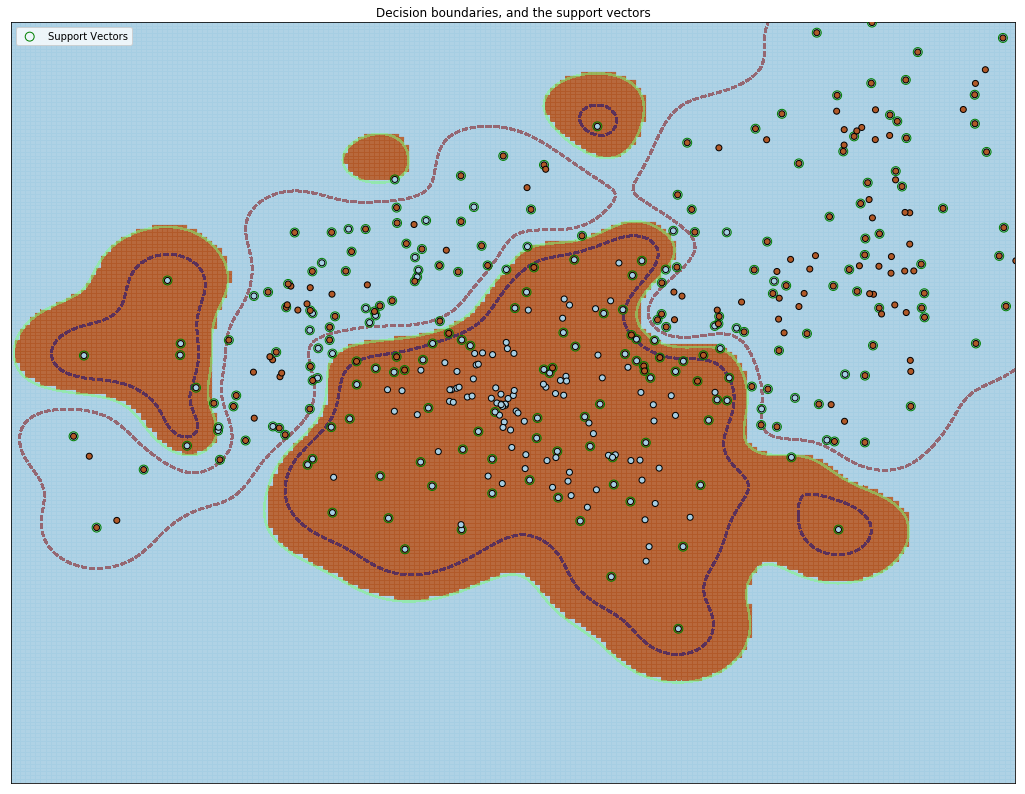

In [22]:
# Using SKLearn package for SVM
from sklearn import svm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import check_pairwise_arrays


X_train = np.concatenate((samples_0,samples_1))
y_train = np.concatenate((labels_0,labels_1))

# Gaussian kernel parameter L 
L = 0.4
gamma = 1/(2 * (L**2))
clf = svm.SVC(kernel='rbf', gamma=gamma)
clf.fit(X_train, y_train.ravel())


# plot the line, the points, and the nearest vectors to the plane
fignum = 1
plt.figure(fignum, figsize=(18, 14))
plt.clf()
# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='g', label = 'Support Vectors')
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -5
x_max = 5
y_min = -5
y_max = 5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z < 0, alpha = 0.9, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, alpha = .5, linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5], cmap=plt.cm.jet, antialiased=False)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.title('Decision boundaries, and the support vectors')
plt.legend()
plt.show()

In [23]:

print('X Train Size\t : ',X_train.shape)
print('Support Vectors\t : ',clf.support_vectors_.shape)
print('\nFraction of training data points that are support vectors')
print('Fraction \t : ', (clf.support_vectors_.shape[0]/X_train.shape[0]) * 100, '%' )


X Train Size	 :  (400, 2)
Support Vectors	 :  (236, 2)

Fraction of training data points that are support vectors
Fraction 	 :  59.0 %


# 2. Adaboost: Write your own code for Adaboost with decision stumps as weak learners.



In [29]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray = np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray

def buildStump(dataArr,classLabels,D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    
    numSteps = 500.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m,1)))
    
    minError = np.inf #init error sum, to +infinity
    
    for i in range(n):#loop over all dimensions
        
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        
        for j in range(-1,int(numSteps)+1):  #loop over all range in current dimension
            
            for inequal in ['lt', 'gt']:     #go over less than and greater than
                
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)#call stump classify with i, j, lessThan
                
                errArr = np.mat(np.ones((m,1)))
                
                errArr[predictedVals == labelMat] = 0
                
                #Line where AdaBoost interacts with the classifier.
                weightedError = D.T*errArr  #calc total error multiplied by D
                
                #print ("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

def adaBoostTrainDS(dataArr,classLabels,numIt=400):
    
    weakClassArr = []
    M = 0
    #mis the number of datapoints in a dataset
    m = np.shape(dataArr)[0]
    
    #D holds all the weights of each peice of data
    D = np.mat(np.ones((m,1))/m)   #init D to all equal
    errorRate = 100000
    #aggregrate estimate of the class for every data point
    aggClassEst = np.mat(np.zeros((m,1)))
    while errorRate > 0.001:
    #for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        #print("D:",D.T)
        alpha = float(0.5*np.log((1.0-error)/max(error,1e-2)))#ca2c alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        #print ("classEst: ",classEst.T)
        
        expon = np.multiply(-1*alpha*np.mat(classLabels).T,classEst) #exponent for D calc, getting messy
        
        D = np.multiply(D,np.exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        #print ("aggClassEst: ",aggClassEst.T)
        
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T,np.ones((m,1)))
        errorRate = aggErrors.sum()/m
        if M%50 == 0:
            print ("total error: ",errorRate)
        M +=1 
        if errorRate == 0.0: 
            break
        if M > numIt:
            break
    return weakClassArr ,aggClassEst

classifierArray,aggClassEst = adaBoostTrainDS(np.mat(data_set[:,0:2]),np.mat(data_set[:,2]),1000)

total error:  0.22
total error:  0.16
total error:  0.1325
total error:  0.1225
total error:  0.1075
total error:  0.1075
total error:  0.1075
total error:  0.0975
total error:  0.095
total error:  0.0975
total error:  0.085
total error:  0.085
total error:  0.0825
total error:  0.0725
total error:  0.0725
total error:  0.075
total error:  0.075
total error:  0.0675
total error:  0.0625
total error:  0.0575
total error:  0.055


In [32]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = np.mat(datToClass)#do stuff similar to last aggClassEst in adaBoostTrainDS
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst =stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])#call stump classify
        aggClassEst += classifierArr[i]['alpha']*classEst
        #print (aggClassEst)
    return np.sign(aggClassEst)

#### 1.1 Plot of the individual decision boundaries for the first five weak learners found


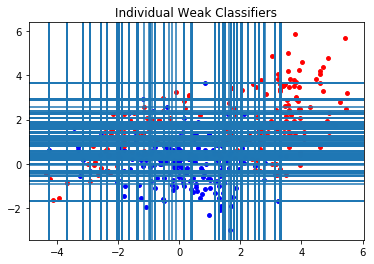

In [33]:
plt.title("Plot - Weak Learners")
plt.scatter(sample_0_data_set[:,0], sample_0_data_set[:,1], s=15, c="blue") 
plt.scatter(sample_1_data_set[:,0], sample_1_data_set[:,1], s=15, c="red")
for i in range(len(classifierArray)):
    if classifierArray[i]['dim'] == 0 :
        #print classifierArray[i]['thresh']
        plt.axvline(x = classifierArray[i]['thresh'])
    if classifierArray[i]['dim'] == 1:
        #print classifierArray[i]['thresh']
        plt.axhline(y = classifierArray[i]['thresh'])    
plt.title("Individual Weak Classifiers")
plt.savefig("weak_1075.png")
#plt.axis([-maxX, maxX, -maxY, maxY])
plt.show()

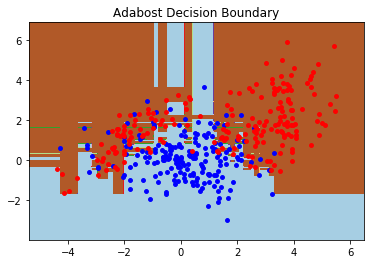

In [34]:
data_list = []
resolution = 100
plot_step = 0.02
colors=('b', 'k', 'r')
fig, ax = plt.subplots()
x_min, x_max = data_set[:, 0].min() - 1, data_set[:, 0].max() + 1
y_min, y_max = data_set[:, 1].min() - 1, data_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = adaClassify(np.ndarray.tolist(np.c_[xx.ravel(), yy.ravel()]),classifierArray)
Z = Z.reshape(xx.shape)

#ax.contour(xx, yy, Z, colors='k')
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# Plot decision contours using grid and
# make a scatter plot of training data
#ax.contour(xrange, yrange, grid, colors='k')
plt.scatter(sample_0_data_set[:,0], sample_0_data_set[:,1], s=15, c="blue") 
plt.scatter(sample_1_data_set[:,0], sample_1_data_set[:,1], s=15, c="red")
#ax.scatter(data_set[:,0], data_set[:,1],c=data_set[:,2], cmap=plt.cm.viridis, lw=0, alpha=0.5)
plt.title("Adabost Decision Boundary")
plt.savefig("adabost_2949.png")
plt.show()                


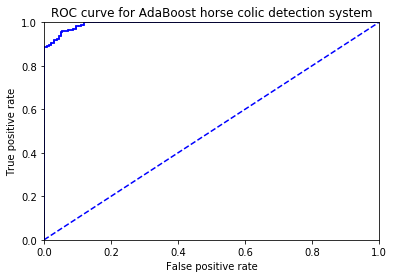

the Area Under the Curve is:  0.9933500000000004


matrix([[-1.]])

In [35]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    %matplotlib inline
    cur = (1.0,1.0) #cursor
    ySum = 0.0 #variable to calculate AUC
    numPosClas = sum(classLabels==1.0)
    yStep = 1/float(numPosClas) 
    xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()#get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    #loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep;
        else:
            delX = xStep; delY = 0;
            ySum += cur[1]
        #draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY], c='b')
        cur = (cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0,1,0,1])
    plt.show()
    print ("the Area Under the Curve is: ",ySum*xStep)
    
plotROC(aggClassEst.T,data_set[:,2])

numPosClas = sum(np.array(np.mat(data_set[:,2]))==1.0)
adaClassify(np.ndarray.tolist(np.c_[xx.ravel(), yy.ravel()]),classifierArray)[399]

No handles with labels found to put in legend.


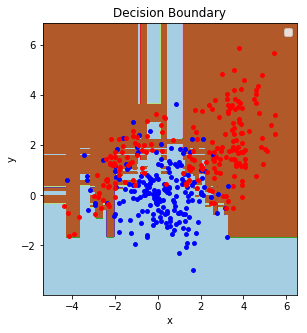

In [36]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = data_set[:, 0].min() - 1, data_set[:, 0].max() + 1
y_min, y_max = data_set[:, 1].min() - 1, data_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = adaClassify(np.ndarray.tolist(np.c_[xx.ravel(), yy.ravel()]),classifierArray)
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

plt.scatter(sample_0_data_set[:,0], sample_0_data_set[:,1], s=15, c="blue") 
plt.scatter(sample_1_data_set[:,0], sample_1_data_set[:,1], s=15, c="red")
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

plt.show()

Observations on top of the report

# END